<a href="https://colab.research.google.com/github/fanziqing/ALY6110-Module-4-Assignment/blob/main/Module4_Assignment_ZiqingFan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Prepare for Running Hive on Pyspark in Colab


In [2]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


# Data Preparation

In [4]:
from google.colab import files
files.upload()

dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

Saving BostonHousing.csv to BostonHousing.csv


In [5]:
# Save dataset to a new table in Hive
dataset.write.mode("overwrite").saveAsTable("BostonHousing")

# Task 1-9

In [6]:
# Task 1: Data Overview

# Retrieve and display the first 5 rows of the dataset to get a sense of the data's structure.
dataset_5 = spark.sql("SELECT * FROM BostonHousing LIMIT 5")
dataset_5.show()

# Find and report the total number of records in the dataset.
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM BostonHousing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+

Total number of records in the dataset: 506


In [7]:
# Task 2: Descriptive Statistics

# Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.
medv_stats = spark.sql("""
SELECT
  MEAN(medv) AS mean_medv,
  STDDEV(medv) AS stddev_medv,
  MIN(medv) AS min_medv,
  MAX(medv) AS max_medv
FROM BostonHousing
""")
medv_stats.show()

# Calculate and display the mean "rm" (average number of rooms per dwelling).
mean_rm = spark.sql("SELECT MEAN(rm) AS mean_rm FROM BostonHousing")
mean_rm.show()

+------------------+-----------------+--------+--------+
|         mean_medv|      stddev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



In [11]:
# Task 3: Data Exploration

# Identify the property with the highest crime rate ("crim"). Provide details about this property.
highest_crime = spark.sql("""
SELECT *
FROM BostonHousing
ORDER BY crim DESC
LIMIT 1
""")
highest_crime.show()

# Find and report the property with the lowest median home value ("medv"). Include its details.
lowest_median_home_value = spark.sql("""
SELECT *
FROM BostonHousing
ORDER BY medv ASC
LIMIT 1
""")
lowest_median_home_value .show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



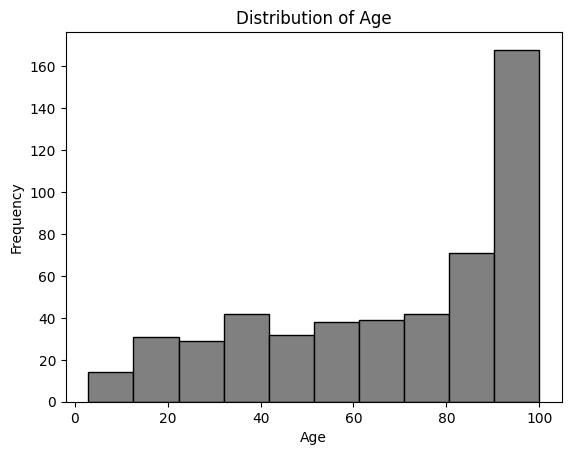

The percentage of properties near Charles River: 6.92%


In [16]:
# Task 4: Data Distribution Analysis

# Create a histogram showing the distribution of the "age" column.
import matplotlib.pyplot as plt

age = dataset.select('age').rdd.flatMap(lambda x: x).collect()
plt.hist(age, bins = 10, color='grey', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Calculate and report the percentage of properties with a "chas" value of 1
# (indicating proximity to the Charles River).
percentage_CharlesRiver = spark.sql("""
SELECT
    (COUNT(CASE WHEN chas = 1 THEN 1 ELSE NULL END) / COUNT(*) * 100) AS percentage_near_CharlesRiver
FROM BostonHousing
""")
percentage_near_CharlesRiver = percentage_CharlesRiver.collect()[0]['percentage_near_CharlesRiver']
print(f"The percentage of properties near Charles River: {percentage_near_CharlesRiver:.2f}%")



In [17]:
# Task 5: Correlation Analysis

# Calculate the correlation coefficient between "rm" and "medv."
# Explain the relationship between the average number of rooms and median home value.
corr_rm_medv = spark.sql("""
SELECT corr(rm, medv) AS correlation_rm_medv
FROM BostonHousing
""")
corr_rm_medv.show()

# Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and
# "nox" (nitrogen oxide concentration). Report your findings.
corr_ptratio_nox = spark.sql("""
SELECT corr(ptratio, nox) AS correlation_ptratio_nox
FROM BostonHousing
""")
corr_ptratio_nox.show()


+-------------------+
|correlation_rm_medv|
+-------------------+
| 0.6953599470715401|
+-------------------+

+-----------------------+
|correlation_ptratio_nox|
+-----------------------+
|    0.18893267711276893|
+-----------------------+



In [18]:
# Task 6: Advanced Querying

# Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").
top5_highest_medv = spark.sql("""
SELECT *
FROM BostonHousing
ORDER BY medv DESC
LIMIT 5
""")
top5_highest_medv.show()

# Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.
average_age_by_chas = spark.sql("""
SELECT chas, AVG(age) AS average_age
FROM BostonHousing
GROUP BY chas
""")
average_age_by_chas.show()


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+

+----+-----------------+
|chas|      average_age|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



+----+----+
| age|medv|
+----+----+
|65.2|24.0|
|78.9|21.6|
|61.1|34.7|
|45.8|33.4|
|54.2|36.2|
+----+----+
only showing top 5 rows



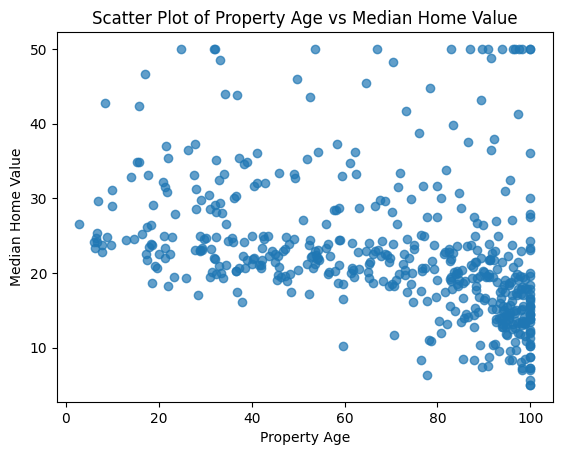

In [19]:
# Task 7: Visualization

# Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.
spark.sql("""
CREATE OR REPLACE VIEW property_age_view AS
SELECT age, medv
FROM BostonHousing
""")
age_view = spark.sql("SELECT * FROM property_age_view")
age_view.show(5)

# Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
age_view_pd = age_view.toPandas()
plt.scatter(age_view_pd['age'], age_view_pd['medv'], alpha=0.7)
plt.title('Scatter Plot of Property Age vs Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.show()


In [24]:
# Task 8: Outliers Detection

# Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
outliers_crim_10 = spark.sql("""
SELECT *
FROM BostonHousing
WHERE crim > 10
""")
outliers_crim_10.show()

outliers_count_ = spark.sql("""
SELECT COUNT(*) AS outlier_count
FROM BostonHousing
WHERE crim > 10
""")
outlier_count = outliers_count_.collect()[0]['outlier_count']
print(f"Number of properties with 'crim' value greater than 10: {outlier_count}")


+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

In [25]:
# Task 9: Hypothesis Testing (20 minutes)

# Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.
# Null Hypothesis : There is no significant linear relationship between the number of rooms ("rm") and the median
# home value ("medv"). The slope of the regression line relating "rm" to "medv" is zero

# Alternative Hypothesis : There is significant linear relationship between the number of rooms ("rm") and the median
# home value ("medv"). The slope of the regression line relating "rm" to "medv" is NOT zero.

# Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols=['rm'], outputCol='features')
vdf = vectorAssembler.transform(dataset)
vdf = vdf.select(['features', 'medv'])

from pyspark.ml.regression import LinearRegression

# Setup the linear regression model
lr = LinearRegression(featuresCol='features', labelCol='medv')
lr_model = lr.fit(vdf)

# Print the coefficients (slope) and intercept (starting point)
print("Coefficients:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)

# Summary of the model
summary = lr_model.summary

# Show the p-value and R2 statistic
print("P-Value for rm coefficient:", summary.pValues[0])
print("R2:", summary.r2)



Coefficients: [9.102108981180814]
Intercept: -34.67062077644179
P-Value for rm coefficient: 0.0
R2: 0.4835254559913341
